In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Todo

* compute singularities from a higher level description of
  * standard scale
  * spaces between cords

# Singularities

In [2]:
# singularities are the points corresponding to 'E' and 'B'
# i.e. points where the next note is half a tone above,
# insted of the usual full tone above 
cords_singulars = [ # high (thin) E first 
    [0, 7],
    [0, 5],
    [4, 9],
    [2, 9],
    [2, 7],
    [0, 7],
]

# Drawing

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#
%matplotlib notebook

In [5]:
# typically [2, 7] -> [0, 2, 3, 5, 7, 8, 10, 12]

def all_dots(singulars):
    result = []
    mark_next = True
    for i in range(0, 13):
        if mark_next:
            result.append(i)
            mark_next = False
        else:
            mark_next = True
        if i in singulars:
            mark_next = True
    return result



In [6]:
# this function maps an integer 
# between 0 (full chord) and 12 (one octave higher)
# to resp.
# 0. and 1.
def expo(i):
    return 2 ** (i/12)

def scale(i):
    return 2 - expo(12-i)

In [7]:
# assuming 0 is for full chord
# and 100 is for one octave higher
full = 0
octave = 1000
vspace = 50

In [8]:
def xloc(i):
    return full + (octave-full)*scale(i)

In [9]:
xticks = [xloc(i) for i in range(13)]
xticks_labels = [str(i) for i in range(13)]

In [10]:
yticks = [ vspace * i for i in range(6)]
yticks_labels = ['E', 'A', 'D', 'G', 'B', 'E']

<IPython.core.display.Javascript object>


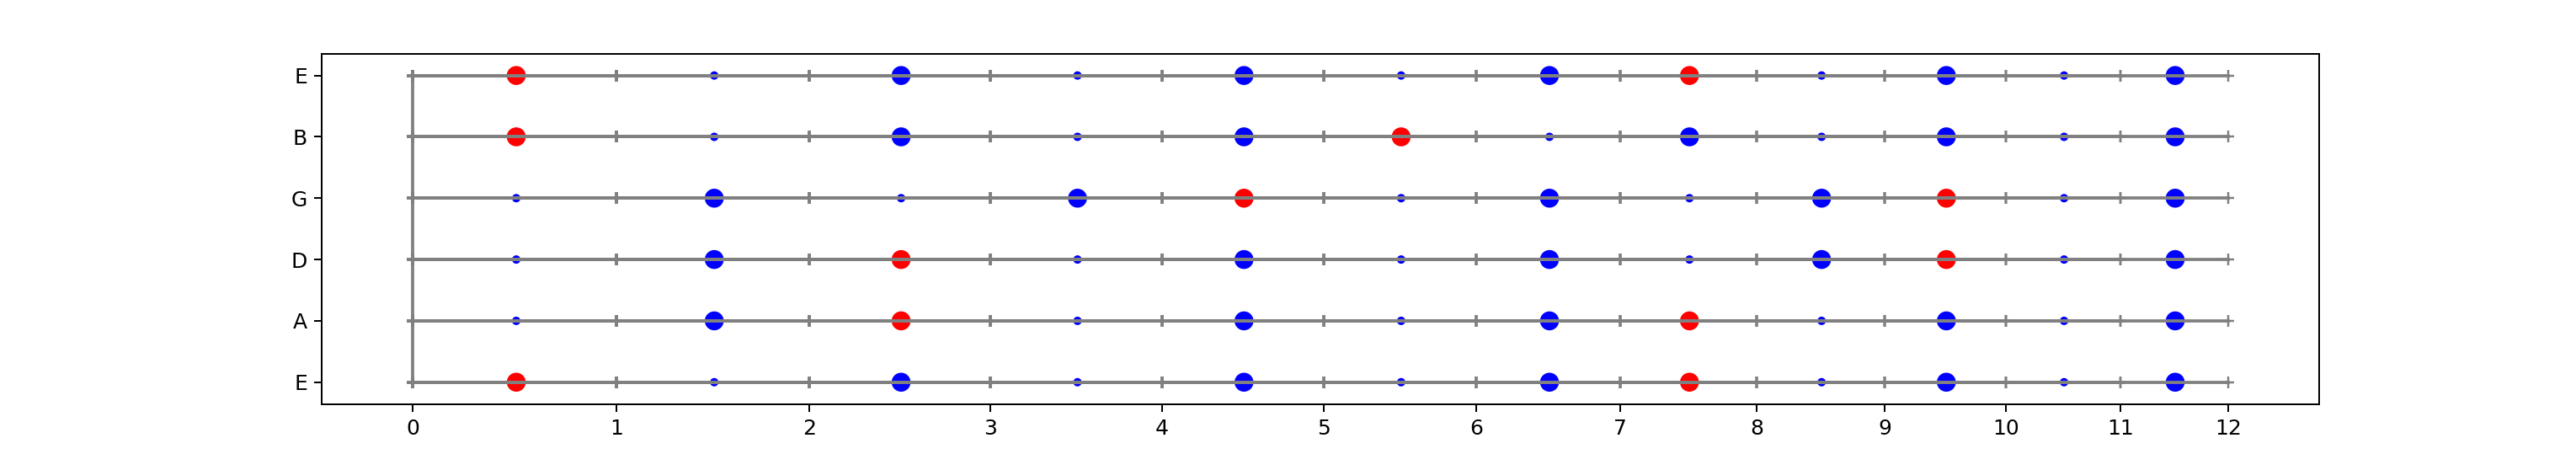

In [11]:
plt.figure(figsize=(17, 3))
# doesn't change anything
#plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.xticks(xticks, xticks_labels)
plt.yticks(yticks, yticks_labels)


# the cords themselves
for cord in range(6):
    X = []
    Y = []
    for i in range(13):
        X.append(xloc(i))
        Y.append(cord * vspace)
        plt.plot(X, Y, marker='+', color='grey')

# fret 0         
fret0 = [ (0, i*vspace) for i in range(6)]
X, Y = zip(*fret0)
plt.plot(X, Y, color='grey')

# the dots
X = []
Y = []
colors = []
sizes = []

for cord, cord_singulars in enumerate(cords_singulars, 1):
    all_cord_dots = all_dots(cord_singulars)
    for i in range(1, 13):
        is_dot = i in all_cord_dots
        X.append(xloc(i-.5))
        Y.append( (6-cord) * vspace)
        note = i % 12
        if note in all_cord_dots:
            size = 64
            color = 'red' if (note - 1) in cord_singulars else 'blue'
        else:
            color = 'blue'
            size = 9
        colors.append(color)
        sizes.append(size)
plt.scatter(X, Y, c=colors, s=sizes, marker='o')
plt.show()